In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("data/results-surveyBody.csv", encoding="utf-8")
df.head()


,Antwort ID,Datum Abgeschickt,Letzte Seite,Start-Sprache,Zufallsstartwert,Datum gestartet,Datum letzte Aktivität,Wie alt sind Sie? (Angabe in Jahren),Welchem Geschlecht fühlen Sie sich zugehörig?,Wie lange haben Sie sich in der Installation aufgehalten?,...,Fragenzeit: G04Q09,Fragenzeit: G04Q10,Fragenzeit: G04Q011,Gruppenzeit: Interaktion wurde wahrgenommen,Fragenzeit: G05Q12,Gruppenzeit: Zufriedenheit,Fragenzeit: G06Q13,Fragenzeit: G06Q14,Fragenzeit: G06Q15,Fragenzeit: G06Q16
0,1,2025-03-02 10:41:53,5,de,1238332965,2025-03-02 10:34:18,2025-03-02 10:41:53,25.0,männlich,5-10 Minuten,...,NaN,NaN,NaN,13.97,NaN,31.43,NaN,NaN,NaN,NaN
1,2,2025-03-02 11:05:56,5,de,476953796,2025-03-02 10:46:05,2025-03-02 11:05:56,62.0,männlich,2-5 Minuten,...,NaN,NaN,NaN,14.97,NaN,44.74,NaN,NaN,NaN,NaN
2,3,2025-03-02 10:54:56,5,de,652159160,2025-03-02 10:52:23,2025-03-02 10:54:56,33.0,männlich,2-5 Minuten,...,NaN,NaN,NaN,11.70,NaN,30.60,NaN,NaN,NaN,NaN
3,4,2025-03-02 10:57:26,5,de,676416710,2025-03-02 10:53:35,2025-03-02 10:57:26,23.0,männlich,2-5 Minuten,...,NaN,NaN,NaN,10.45,NaN,86.53,NaN,NaN,NaN,NaN
4,5,2025-03-02 10:57:08,5,de,1923287683,2025-03-02 10:55:20,2025-03-02 10:57:08,30.0,männlich,5-10 Minuten,...,NaN,NaN,NaN,7.96,NaN,26.47,NaN,NaN,NaN,NaN


In [103]:
# Beispiel: alles, was mit "Fragenzeit:" oder "Gruppenzeit:" oder "Zufallsstartwert" beginnt
technical_cols = [col for col in df.columns if col.startswith("Fragenzeit:") 
                  or col.startswith("Gruppenzeit:") 
                  or "Zufallsstartwert" in col 
                  or "Letzte Seite" in col 
                  or "Start-Sprache" in col]

df_cleaned = df.drop(columns=technical_cols)
df_cleaned.head()

,Antwort ID,Datum Abgeschickt,Datum gestartet,Datum letzte Aktivität,Wie alt sind Sie? (Angabe in Jahren),Welchem Geschlecht fühlen Sie sich zugehörig?,Wie lange haben Sie sich in der Installation aufgehalten?,Haben Sie bereits Erfahrung mit interaktiven Kunstinstallationen?,Umgang mit Technologie [ Wie sicher fühlen Sie sich im Umgang mit modernen digitalen Technologien? ],"Räumliche Präsenz Skala [Ich hatte das Gefühl, dass ich in der Umgebung der Projektion tatsächlich anwesend war. ]",...,"Interaktions Skala [Ich hatte das Gefühl, dass ich mich zwischen den Objekten in der Projektion bewegen konnte.]","Interaktions Skala [Ich hatte den Eindruck, dass ich in der Umgebung der Projektion alles tun konnte, was ich wollte.]",Systemeffizienz [Das System reagierte schnell und ohne spürbare Verzögerung auf meine Eingaben.],Systemeffizienz [Die Steuerung des Systems war intuitiv und leicht verständlich.],Systemeffizienz [Ich konnte meine beabsichtigten Aktionen problemlos ausführen.],Gesamteindruck [Wie zufrieden waren Sie insgesamt mit der Rauminstallation?],Was hat Ihnen an der Installation am meisten gefallen?,Was hätte verbessert werden können?,Würden Sie diese Installation weiterempfehlen?,Gesamtzeit
0,1,2025-03-02 10:41:53,2025-03-02 10:34:18,2025-03-02 10:41:53,25.0,männlich,5-10 Minuten,"Ja, einmal",5,5,...,4,5,4.0,5.0,5.0,5,NaN,NaN,Ja,456.93
1,2,2025-03-02 11:05:56,2025-03-02 10:46:05,2025-03-02 11:05:56,62.0,männlich,2-5 Minuten,Nein,4,5,...,5,5,5.0,5.0,5.0,5,"Was so alles mit KI funktioniert, echt toll",nichts,Ja,750.36
2,3,2025-03-02 10:54:56,2025-03-02 10:52:23,2025-03-02 10:54:56,33.0,männlich,2-5 Minuten,"Ja, mehrfach",5,5,...,5,5,5.0,5.0,5.0,5,die interaktivität,nichts,Ja,155.24
3,4,2025-03-02 10:57:26,2025-03-02 10:53:35,2025-03-02 10:57:26,23.0,männlich,2-5 Minuten,"Ja, mehrfach",5,5,...,2,2,4.0,5.0,4.0,5,Interaktion,Anweisungrn,Ja,232.92
4,5,2025-03-02 10:57:08,2025-03-02 10:55:20,2025-03-02 10:57:08,30.0,männlich,5-10 Minuten,"Ja, einmal",4,5,...,5,4,5.0,4.0,5.0,5,Interaktion mit den Blumen,Nichts,Ja,110.13


In [104]:
# 3. Funktion zum Extrahieren aus Klammern
def extract_bracket_text(colname):
    match = re.search(r"\[(.*?)\]", colname)
    return match.group(1).strip() if match else colname.strip()

In [105]:
# 4. Fragetexte extrahieren
df = df.rename(columns={col: extract_bracket_text(col) for col in df.columns})

In [106]:
# 5. Spalten umbenennen (Mapping)
column_mapping = {
    "Datum Abgeschickt": "Zeitstempel",
    "Wie alt sind Sie? (Angabe in Jahren)": "Alter",
    "Welchem Geschlecht fühlen Sie sich zugehörig?": "Geschlecht",
    "Wie lange haben Sie sich in der Installation aufgehalten?": "Aufenthaltsdauer",
    "Haben Sie bereits Erfahrung mit interaktiven Kunstinstallationen?": "Erfahrung",
    "Wie sicher fühlen Sie sich im Umgang mit modernen digitalen Technologien": "Digitale Kompetenz",
    "Ich hatte das Gefühl, dass ich in der Umgebung der Projektion tatsächlich anwesend war.": "SL1",
    "Es schien, als ob ich tatsächlich an der Darstellung beteiligt war.": "SL2",
    "Es kam mir vor, als hätte sich mein wahrer Standort in die Umgebung der Projektion verschoben.": "SL3",
    "Ich hatte das Gefühl, dass ich in der Umgebung der Projektion physisch anwesend war.": "SL4",
    "Die Objekte in der Projektion gaben mir das Gefühl, dass ich mit ihnen etwas anfangen kann.": "PA1",
    "Ich hatte den Eindruck, dass ich in der Umgebung der Projektion agieren konnte.": "PA2",
    "Ich hatte das Gefühl, dass ich mich zwischen den Objekten in der Projektion bewegen konnte.": "PA3",
    "Ich hatte den Eindruck, dass ich in der Umgebung der Projektion alles tun konnte, was ich wollte.": "PA4",
    "Haben Sie bemerkt, dass ihre Bewegung die Projektion auf der linken Seite beeinflusst?": "Interaktion_bemerkt",
    "Das System reagierte schnell und ohne spürbare Verzögerung auf meine Eingaben.": "UX1",
    "Die Steuerung des Systems war intuitiv und leicht verständlich.": "UX2",
    "Ich konnte meine beabsichtigten Aktionen problemlos ausführen.": "UX3",
    "Wie zufrieden waren Sie insgesamt mit der Rauminstallation?": "Zufriedenheit",
    "Würden Sie diese Installation weiterempfehlen?": "Empfehlung"


}
df = df.rename(columns=column_mapping)

In [107]:
# SPES-Unterteilung

# 6. SPES-Spalten
sl_items = ["SL1", "SL2", "SL3", "SL4"]
pa_items = ["PA1", "PA2", "PA3", "PA4"]
print(sl_items)
print(pa_items)



['SL1', 'SL2', 'SL3', 'SL4']
['PA1', 'PA2', 'PA3', 'PA4']


In [108]:
# 7. Likert-Mapping
likert_map = {
    "Stimme überhaupt nicht zu": 1,
    "Stimme eher nicht zu": 2,
    "Neutral": 3,
    "Stimme eher zu": 4,
    "Stimme voll und ganz zu": 5,
}

def extract_likert_value(text):
    if pd.isna(text):
        return np.nan
    for key, value in likert_map.items():
        if key in str(text):
            return value
    try:
        return int(text)
    except:
        return np.nan

for col in sl_items + pa_items:
    df[col] = df[col].apply(extract_likert_value)

In [109]:
# 8. Mittelwerte
df["SL_Mean"] = df[sl_items].mean(axis=1)
df["PA_Mean"] = df[pa_items].mean(axis=1)

In [110]:
df[["SL_Mean", "PA_Mean"]].describe()

,SL_Mean,PA_Mean
count,104.000000,104.000000
mean,3.209135,3.456731
std,1.007924,1.119359
min,1.000000,1.000000
25%,2.750000,2.750000
50%,3.250000,3.500000
75%,4.000000,4.500000
max,5.000000,5.000000


In [150]:
df["Interaktion_bemerkt"] = df["Interaktion_bemerkt"].apply(lambda x: "Ja" if x == "Ja" else "Nein")


In [151]:
df.groupby("Interaktion_bemerkt")[["SL_Mean", "PA_Mean"]].mean()
# Mittelwerte für SL und PA nach Interaktion erkannt


,SL_Mean,PA_Mean
Interaktion_bemerkt,,
Ja,3.586066,3.885246
Nein,2.674419,2.848837


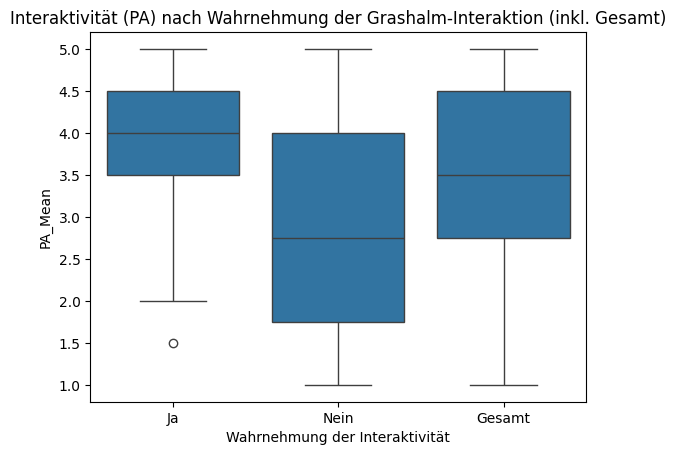

In [113]:
# Neue Kopie der Daten mit "Gesamt"-Gruppe
df_gesamt = df.copy()
df_gesamt["Interaktion_bemerkt"] = "Gesamt"

# Kombinieren der Gruppen
df_combined = pd.concat([df, df_gesamt], ignore_index=True)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_combined, x="Interaktion_bemerkt", y="PA_Mean")
plt.title("Interaktivität (PA) nach Wahrnehmung der Grashalm-Interaktion (inkl. Gesamt)")
plt.xlabel("Wahrnehmung der Interaktivität")
plt.ylabel("PA_Mean")
plt.show()


In [114]:
ux_items = ["UX1", "UX2", "UX3"]
# UX Items (Neue Skala für Systemeffizienz)

In [115]:
df_interaktiv = df[df["Interaktion_bemerkt"] == "Ja"].copy()
# Neuer Dataframe für Interaktion erkannt


In [116]:
from scipy.stats import zscore
from numpy import nanmean

def cronbach_alpha(df_subset):
    df_corr = df_subset.corr()
    N = len(df_subset.columns)
    mean_corr = df_corr.where(~np.eye(N, dtype=bool)).mean().mean()
    return (N * mean_corr) / (1 + (N - 1) * mean_corr)

for col in ux_items:
    df_interaktiv[col] = df_interaktiv[col].apply(extract_likert_value)

print(cronbach_alpha(df_interaktiv[ux_items]))
# Cronbachs Alpha für UX Items (Interaktion erkannt)
print(df_interaktiv[ux_items].describe())

0.7946260467074991
             UX1        UX2        UX3
count  61.000000  61.000000  61.000000
mean    3.918033   3.934426   4.032787
std     1.069191   1.123519   1.110063
min     1.000000   1.000000   1.000000
25%     3.000000   3.000000   3.000000
50%     4.000000   4.000000   4.000000
75%     5.000000   5.000000   5.000000
max     5.000000   5.000000   5.000000


In [117]:
print("Cronbach’s Alpha für SL:", cronbach_alpha(df[sl_items]))
print("Cronbach’s Alpha für PA:", cronbach_alpha(df[pa_items]))
print("Cronbach’s Alpha für SPES (gesamt):", cronbach_alpha(df[sl_items + pa_items]))
# Cronbach’s Alpha für SL, PA und SPES (gesamt)

Cronbach’s Alpha für SL: 0.811355279180546
Cronbach’s Alpha für PA: 0.8320757789704532
Cronbach’s Alpha für SPES (gesamt): 0.8882435913053073


In [118]:
# Gruppe: Interaktion bemerkt
df_interaktion_bemerkt = df[df["Interaktion_bemerkt"] == "Ja"]

# Gruppe: Interaktion nicht bemerkt
df_interaktion_nicht_bemerkt = df[df["Interaktion_bemerkt"] == "Nein"]

# Gruppe: Gesamt (alle Teilnehmenden)
df_gesamt = df.copy()

In [119]:
# Interessante Variablen
interessante_variablen = [
    "SL_Mean", "PA_Mean",
    "Empfehlung", "Alter", "Zufriedenheit",
    "Geschlecht", "Erfahrung", "Aufenthaltsdauer"
]

# Deskriptive Statistik für alle Variablen (einschließlich nicht-numerischer)
print("🔍 Deskriptive Statistik – Interaktion bemerkt")
print(df_interaktion_bemerkt[interessante_variablen].describe(include='all'))

print("\n🔍 Deskriptive Statistik – Interaktion nicht bemerkt")
print(df_interaktion_nicht_bemerkt[interessante_variablen].describe(include='all'))

print("\n🔍 Deskriptive Statistik – Gesamt")
print(df_gesamt[interessante_variablen].describe(include='all'))


# Hier nochmal ransetzen Zufriedenheitsskala noch nicht richtig codiert

🔍 Deskriptive Statistik – Interaktion bemerkt
          SL_Mean    PA_Mean Empfehlung      Alter  Zufriedenheit Geschlecht  \
count   61.000000  61.000000         61  61.000000      61.000000         61   
unique        NaN        NaN          3        NaN            NaN          2   
top           NaN        NaN         Ja        NaN            NaN   weiblich   
freq          NaN        NaN         54        NaN            NaN         32   
mean     3.586066   3.885246        NaN  43.213115       4.229508        NaN   
std      0.787778   0.838617        NaN  18.013990       0.920026        NaN   
min      1.750000   1.500000        NaN   9.000000       1.000000        NaN   
25%      3.000000   3.500000        NaN  26.000000       4.000000        NaN   
50%      3.500000   4.000000        NaN  42.000000       4.000000        NaN   
75%      4.000000   4.500000        NaN  60.000000       5.000000        NaN   
max      5.000000   5.000000        NaN  77.000000       5.000000        N

In [120]:
#Durchführen von ttest

# Gruppen aufteilen
gruppe_ja = df[df["Interaktion_bemerkt"] == "Ja"]
gruppe_nein = df[df["Interaktion_bemerkt"] == "Nein"]


In [121]:
#Berechnung für PA_Mean
from scipy.stats import ttest_ind

# Werte extrahieren
pa_ja = gruppe_ja["PA_Mean"]
pa_nein = gruppe_nein["PA_Mean"]

# Welch's t-Test (empfohlen bei ungleicher Varianz/Größe)
t_pa, p_pa = ttest_ind(pa_ja, pa_nein, equal_var=False)

print(f"t-Wert PA_Mean: {t_pa:.3f}, p-Wert: {p_pa:.3f}")


t-Wert PA_Mean: 4.906, p-Wert: 0.000


In [122]:
#Berechnung für SL_Mean
sl_ja = gruppe_ja["SL_Mean"]
sl_nein = gruppe_nein["SL_Mean"]

t_sl, p_sl = ttest_ind(sl_ja, sl_nein, equal_var=False)
print(f"t-Wert SL_Mean: {t_sl:.3f}, p-Wert: {p_sl:.3f}")

t-Wert SL_Mean: 4.812, p-Wert: 0.000


In [123]:
#SPES Mean berechnen
# Berechnung von SPES_Mean
spes_items = sl_items + pa_items  # SL- und PA-Items kombinieren
df["SPES_Mean"] = df[spes_items].mean(axis=1)


In [124]:
# Filtern der Gruppen basierend auf der Spalte "Interaktion_bemerkt"
gruppe_ja = df[df["Interaktion_bemerkt"] == "Ja"]
gruppe_nein = df[df["Interaktion_bemerkt"] == "Nein"]


In [125]:
# Berechnung für SPES
spes_ja = gruppe_ja["SPES_Mean"]
spes_nein = gruppe_nein["SPES_Mean"]

# t-Test durchführen
from scipy.stats import ttest_ind

t_spes, p_spes = ttest_ind(spes_ja, spes_nein, equal_var=False)
print(f"t-Wert SPES_Mean: {t_spes:.3f}, p-Wert: {p_spes:.3f}")


t-Wert SPES_Mean: 5.316, p-Wert: 0.000


In [126]:
#Berechnung Cohens d (Effektstärke)
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*x.std()**2 + (ny - 1)*y.std()**2) / (nx + ny - 2))
    return (x.mean() - y.mean()) / pooled_std

d_pa = cohens_d(gruppe_ja["PA_Mean"], gruppe_nein["PA_Mean"])
d_sl = cohens_d(gruppe_ja["SL_Mean"], gruppe_nein["SL_Mean"])
d_spes = cohens_d(gruppe_ja["SPES_Mean"], gruppe_nein["SPES_Mean"])


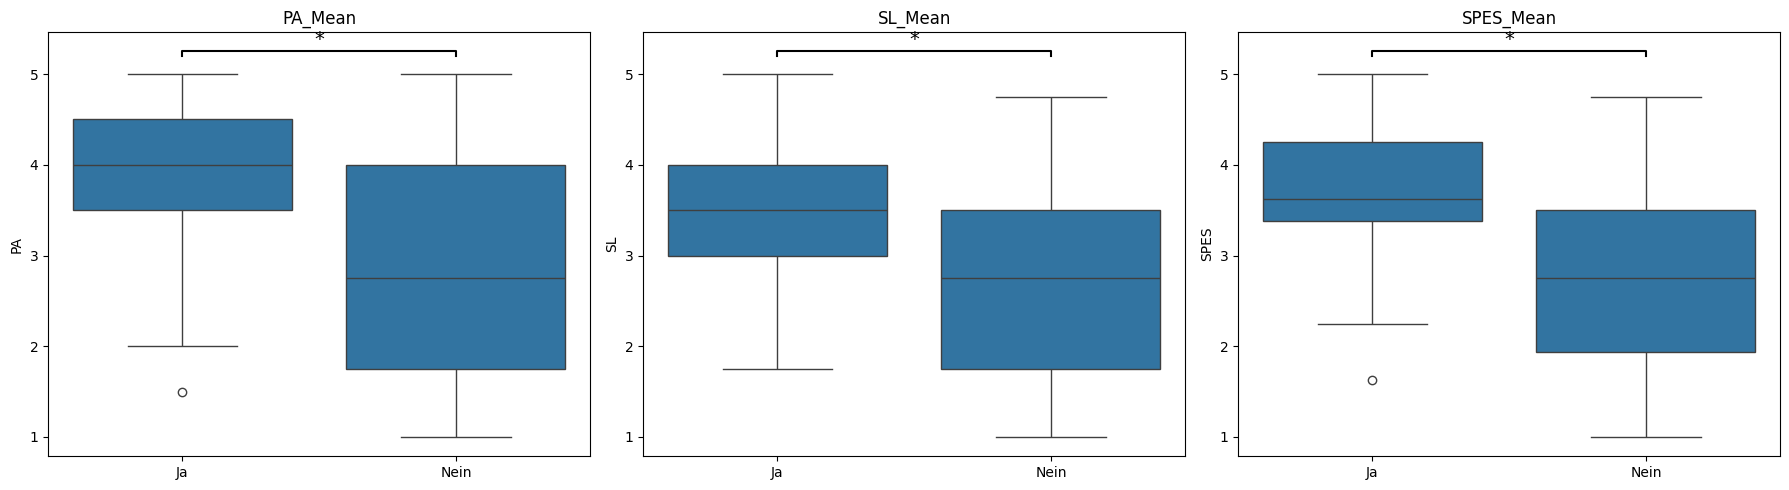

In [127]:
#Visualisierung von ttests durch Boxplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot für PA
sns.boxplot(data=df, x="Interaktion_bemerkt", y="PA_Mean", ax=axs[0])
axs[0].set_title("PA_Mean")
axs[0].set_xlabel("")
axs[0].set_ylabel("PA")

# Signifikanzbalken
y = df["PA_Mean"].max() + 0.2
axs[0].plot([0, 0, 1, 1], [y, y+0.05, y+0.05, y], lw=1.5, c='black')
axs[0].text(0.5, y + 0.08, "*", ha='center', va='bottom', fontsize=14)

# Plot für SL
sns.boxplot(data=df, x="Interaktion_bemerkt", y="SL_Mean", ax=axs[1])
axs[1].set_title("SL_Mean")
axs[1].set_xlabel("")
axs[1].set_ylabel("SL")
y = df["SL_Mean"].max() + 0.2
axs[1].plot([0, 0, 1, 1], [y, y+0.05, y+0.05, y], lw=1.5, c='black')
axs[1].text(0.5, y + 0.08, "*", ha='center', va='bottom', fontsize=14)

# Plot für SPES
sns.boxplot(data=df, x="Interaktion_bemerkt", y="SPES_Mean", ax=axs[2])
axs[2].set_title("SPES_Mean")
axs[2].set_xlabel("")
axs[2].set_ylabel("SPES")
y = df["SPES_Mean"].max() + 0.2
axs[2].plot([0, 0, 1, 1], [y, y+0.05, y+0.05, y], lw=1.5, c='black')
axs[2].text(0.5, y + 0.08, "*", ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()


In [128]:
# Ergebnisse visualisieren in Tabelle
results_df = pd.DataFrame({
    "Variable": ["PA_Mean", "SL_Mean", "SPES_Mean"],
    "t-Wert": [4.906, 4.812, 5.316],
    "p-Wert": [0.000, 0.000, 0.000],
    "Cohen's d": [d_pa, d_sl, d_spes]
})

display(results_df)
# Ausgabe der Ausprägungen der ux_items-Spalten


,Variable,t-Wert,p-Wert,Cohen's d
0,PA_Mean,4.906,0.0,1.036591
1,SL_Mean,4.812,0.0,1.006520
2,SPES_Mean,5.316,0.0,1.125420


In [129]:
# Überprüfen, ob noch nicht-numerische Werte vorhanden sind
for col in ux_items:
    non_numeric = df_interaktiv[col].apply(lambda x: isinstance(x, str) and not x.isnumeric())
    print(f"Nicht-numerische Werte in der Spalte {col}:")
    print(df_interaktiv[non_numeric][col])
    print("\n")


Nicht-numerische Werte in der Spalte UX1:
Series([], Name: UX1, dtype: int64)


Nicht-numerische Werte in der Spalte UX2:
Series([], Name: UX2, dtype: int64)


Nicht-numerische Werte in der Spalte UX3:
Series([], Name: UX3, dtype: int64)




In [130]:
import re

# Funktion, um nur die Zahl aus einem Text herauszufiltern
def extract_number_from_text(text):
    if pd.isna(text):
        return np.nan
    # Sucht nach der ersten Zahl im Text und gibt sie zurück
    match = re.search(r'\d+', str(text))  # Sucht nach einer Zahl
    if match:
        return int(match.group())  # Gibt die Zahl zurück
    return np.nan  # Falls keine Zahl gefunden wurde, NaN zurückgeben

# Wende diese Funktion auf alle relevanten UX-Spalten an
df_interaktiv[ux_items] = df_interaktiv[ux_items].map(extract_number_from_text)

# Überprüfe die Umwandlung
print(df_interaktiv[ux_items].head())


   UX1  UX2  UX3
0    4    5    5
1    5    5    5
2    5    5    5
3    4    5    4
4    5    4    5


In [131]:
# Mapping der Likert-Texte zu Zahlen
likert_map = {
    "Stimme überhaupt nicht zu": 1,
    "Stimme eher nicht zu": 2,
    "Neutral": 3,
    "Stimme eher zu": 4,
    "Stimme voll und ganz zu": 5,
}

# Funktion, die den Textwert auf der Basis der Likert-Skala umwandelt
def extract_likert_value(text):
    if pd.isna(text):
        return np.nan
    for key, value in likert_map.items():
        if key in str(text):  # Überprüft, ob der Textwert mit einem Likert-Wert übereinstimmt
            return value
    try:
        return int(text)  # Für den Fall, dass der Text bereits eine Zahl ist (z.B. "5")
    except:
        return np.nan  # Wenn der Text nicht in einen Wert umgewandelt werden kann

# Wende diese Funktion auf alle relevanten UX-Spalten an
for col in ux_items:
    df_interaktiv[col] = df_interaktiv[col].map(extract_likert_value)


# Überprüfe die Umwandlung
print(df_interaktiv[ux_items].head())
df_interaktiv["UX_Mean"] = df_interaktiv[ux_items].mean(axis=1)

# Ausgabe des berechneten Mittelwerts
print(df_interaktiv["UX_Mean"].head())
print(df_interaktiv[ux_items].describe())


   UX1  UX2  UX3
0    4    5    5
1    5    5    5
2    5    5    5
3    4    5    4
4    5    4    5
0    4.666667
1    5.000000
2    5.000000
3    4.333333
4    4.666667
Name: UX_Mean, dtype: float64
             UX1        UX2        UX3
count  61.000000  61.000000  61.000000
mean    3.918033   3.934426   4.032787
std     1.069191   1.123519   1.110063
min     1.000000   1.000000   1.000000
25%     3.000000   3.000000   3.000000
50%     4.000000   4.000000   4.000000
75%     5.000000   5.000000   5.000000
max     5.000000   5.000000   5.000000


In [132]:
# UX-Mittelwert berechnen – nur für Gruppe "Ja"
df_interaktiv["UX_Mean"] = df_interaktiv[ux_items].mean(axis=1)

# Ausgabe des berechneten Mittelwerts
print(df_interaktiv["UX_Mean"].head())
print(df_interaktiv[ux_items].describe())

0    4.666667
1    5.000000
2    5.000000
3    4.333333
4    4.666667
Name: UX_Mean, dtype: float64
             UX1        UX2        UX3
count  61.000000  61.000000  61.000000
mean    3.918033   3.934426   4.032787
std     1.069191   1.123519   1.110063
min     1.000000   1.000000   1.000000
25%     3.000000   3.000000   3.000000
50%     4.000000   4.000000   4.000000
75%     5.000000   5.000000   5.000000
max     5.000000   5.000000   5.000000


In [133]:
# Nur die Gruppe, die die Interaktion bemerkt hat
df_interaktiv_ja = df_interaktiv[df_interaktiv["Interaktion_bemerkt"] == "Ja"]

# Berechnung des UX-Mittelwerts für die Gruppe "Ja"
mean_interaktion_bemerkt = df_interaktiv_ja["UX_Mean"].mean()

# Ausgabe des Mittelwerts
print(f"UX-Mittelwert für die Gruppe 'Interaktion bemerkt': {mean_interaktion_bemerkt}")



UX-Mittelwert für die Gruppe 'Interaktion bemerkt': 3.961748633879781


In [ ]:
#SPES_Mean für Dataframe Interaktiv definieren
df_interaktiv["SPES_Mean"] = df_interaktiv[sl_items + pa_items].mean(axis=1)


In [136]:
from scipy.stats import pearsonr


# A) Immersion vs. Interaktivität (gesamte Stichprobe)
r_sl_pa, p_sl_pa = pearsonr(df["SL_Mean"], df["PA_Mean"])

# B) UX vs. Interaktivität (nur Gruppe "Ja")
r_ux_pa, p_ux_pa = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["PA_Mean"])

# C) UX vs. Immersion (nur Gruppe "Ja")
r_ux_sl, p_ux_sl = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["SL_Mean"])

# D) UX vs. SPES (nur Gruppe "Ja")
r_ux_spes, p_ux_spes = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["SPES_Mean"])


In [137]:
# Tabelle erstellen
correlation_df = pd.DataFrame({
    "Korrelation": [
        "SL_Mean ↔ PA_Mean (gesamt)",
        "UX_Mean ↔ PA_Mean (nur 'Ja')",
        "UX_Mean ↔ SL_Mean (nur 'Ja')",
        "UX_Mean ↔ SPES_Mean (nur 'Ja')"
    ],
    "r-Wert": [r_sl_pa, r_ux_pa, r_ux_sl, r_ux_spes],
    "p-Wert": [p_sl_pa, p_ux_pa, p_ux_sl, p_ux_spes]
})

# Ergebnisse anzeigen
display(correlation_df)


,Korrelation,r-Wert,p-Wert
0,SL_Mean ↔ PA_Mean (gesamt),0.721262,5.860046e-18
1,UX_Mean ↔ PA_Mean (nur 'Ja'),0.694482,5.380637e-10
2,UX_Mean ↔ SL_Mean (nur 'Ja'),0.546526,5.199952e-06
3,UX_Mean ↔ SPES_Mean (nur 'Ja'),0.703163,2.642147e-10


In [139]:
# Neue Altersgruppen erstellen (z. B. in 10er-Schritten)
df["Altersgruppe"] = pd.cut(
    df["Alter"],
    bins=[0, 19, 29, 39, 49, 59, 120],
    labels=["<20", "20–29", "30–39", "40–49", "50–59", "60+"]
)


In [140]:
from scipy.stats import chi2_contingency

# Kontingenztabelle erstellen
alter_kontingenz = pd.crosstab(df["Interaktion_bemerkt"], df["Altersgruppe"])

# Chi²-Test berechnen
chi2_alt, p_alt, dof_alt, expected_alt = chi2_contingency(alter_kontingenz)

# Ergebnisse ausgeben
print("Chi²-Wert:", round(chi2_alt, 3))
print("p-Wert:", round(p_alt, 3))
print("Freiheitsgrade:", dof_alt)
print("\nErwartete Häufigkeiten:")
print(pd.DataFrame(expected_alt, index=alter_kontingenz.index, columns=alter_kontingenz.columns))


Chi²-Wert: 9.131
p-Wert: 0.104
Freiheitsgrade: 5

Erwartete Häufigkeiten:
Altersgruppe              <20      20–29     30–39     40–49      50–59  \
Interaktion_bemerkt                                                       
Ja                   7.106796  10.067961  7.699029  7.106796  15.990291   
Nein                 4.893204   6.932039  5.300971  4.893204  11.009709   

Altersgruppe               60+  
Interaktion_bemerkt             
Ja                   13.029126  
Nein                  8.970874  


In [ ]:
# Nur relevante UX-Spalten aus der interaktiven Gruppe
korrelationsmatrix = df_interaktiv[ux_items].corr()

# Ausgabe der Korrelationsmatrix
print("Inter-Item-Korrelationsmatrix (UX):")
print(korrelationsmatrix.round(2))


🔗 Inter-Item-Korrelationsmatrix (UX):
      UX1   UX2   UX3
UX1  1.00  0.58  0.52
UX2  0.58  1.00  0.59
UX3  0.52  0.59  1.00


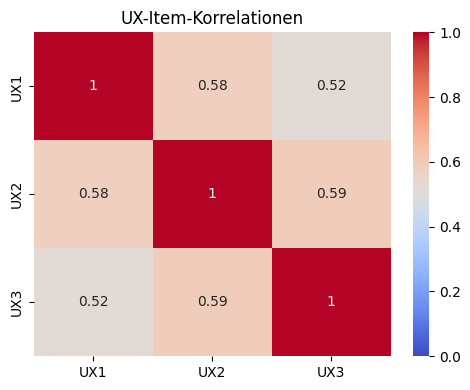

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(korrelationsmatrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("UX-Item-Korrelationen")
plt.tight_layout()
plt.show()


In [147]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardisierung der UX-Daten (nur interaktive Gruppe)
scaler = StandardScaler()
ux_scaled = scaler.fit_transform(df_interaktiv[ux_items])

# PCA mit einem Faktor
pca = PCA(n_components=1)
pca.fit(ux_scaled)

# Faktorladungen berechnen
loadings = pd.Series(pca.components_[0], index=ux_items)

# Ergebnisse anzeigen
print("\nFaktorladungen der UX-Items:")
print(loadings.round(2))

# Erklärte Varianz anzeigen
print("\nErklärte Varianz durch Faktor 1:", round(pca.explained_variance_ratio_[0] * 100, 2), "%")



Faktorladungen der UX-Items:
UX1    0.57
UX2    0.59
UX3    0.57
dtype: float64

Erklärte Varianz durch Faktor 1: 70.9 %
